# Diabetic Retinopathy

In [1]:
from platform import python_version
print(python_version())

3.9.12


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## IMPORTING DATA

In [3]:
retinopathy_df=pd.read_csv('Retinopathy.csv')

In [4]:
retinopathy_df

,image,level,image_shape,image_size,height,width,channel
0,1_left,0,"(2336, 3504, 3)",1147508,2336,3504,3
1,1_right,0,"(2336, 3504, 3)",1183978,2336,3504,3
2,2_left,0,"(1920, 2560, 3)",359372,1920,2560,3
3,2_right,0,"(1920, 2560, 3)",376230,1920,2560,3
4,3_left,0,"(1920, 2560, 3)",481639,1920,2560,3
...,...,...,...,...,...,...,...
53571,44346_right,0,"(2592, 3888, 3)",1427191,2592,3888,3
53572,44350_left,0,"(2592, 3888, 3)",1115948,2592,3888,3
53573,44350_right,0,"(2592, 3888, 3)",1148557,2592,3888,3
53574,44351_left,0,"(1944, 2592, 3)",673356,1944,2592,3


## EXPLORING DATA

In [5]:
retinopathy_df.info

<bound method DataFrame.info of              image  level      image_shape  image_size  height  width  channel
0           1_left      0  (2336, 3504, 3)     1147508    2336   3504        3
1          1_right      0  (2336, 3504, 3)     1183978    2336   3504        3
2           2_left      0  (1920, 2560, 3)      359372    1920   2560        3
3          2_right      0  (1920, 2560, 3)      376230    1920   2560        3
4           3_left      0  (1920, 2560, 3)      481639    1920   2560        3
...            ...    ...              ...         ...     ...    ...      ...
53571  44346_right      0  (2592, 3888, 3)     1427191    2592   3888        3
53572   44350_left      0  (2592, 3888, 3)     1115948    2592   3888        3
53573  44350_right      0  (2592, 3888, 3)     1148557    2592   3888        3
53574   44351_left      0  (1944, 2592, 3)      673356    1944   2592        3
53575  44351_right      0  (1944, 2592, 3)      611923    1944   2592        3

[53576 rows x 7 col

In [6]:
retinopathy_df.describe

<bound method NDFrame.describe of              image  level      image_shape  image_size  height  width  channel
0           1_left      0  (2336, 3504, 3)     1147508    2336   3504        3
1          1_right      0  (2336, 3504, 3)     1183978    2336   3504        3
2           2_left      0  (1920, 2560, 3)      359372    1920   2560        3
3          2_right      0  (1920, 2560, 3)      376230    1920   2560        3
4           3_left      0  (1920, 2560, 3)      481639    1920   2560        3
...            ...    ...              ...         ...     ...    ...      ...
53571  44346_right      0  (2592, 3888, 3)     1427191    2592   3888        3
53572   44350_left      0  (2592, 3888, 3)     1115948    2592   3888        3
53573  44350_right      0  (2592, 3888, 3)     1148557    2592   3888        3
53574   44351_left      0  (1944, 2592, 3)      673356    1944   2592        3
53575  44351_right      0  (1944, 2592, 3)      611923    1944   2592        3

[53576 rows x 7 c

## Missing Values

In [7]:
retinopathy_df.isna().sum()

image          0
level          0
image_shape    0
image_size     0
height         0
width          0
channel        0
dtype: int64

## Duplicates

In [8]:
retinopathy_df.duplicated().sum()

0

## Outliers 

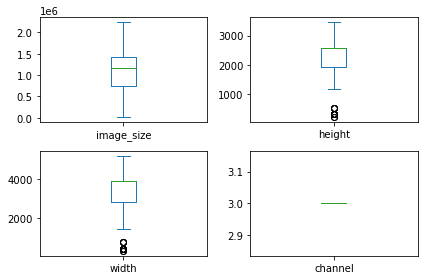

In [9]:
plt.subplot(2,2,1) 
retinopathy_df['image_size'].plot(kind='box') 

plt.subplot(2,2,2) 
retinopathy_df['height'].plot(kind='box') 

plt.subplot(2,2,3) 
retinopathy_df['width'].plot(kind='box') 

plt.subplot(2,2,4) 
retinopathy_df['channel'].plot(kind='box') 

plt.tight_layout()

In [10]:
def find_outlier_limits(col_name):
    Q1,Q3=retinopathy_df[col_name].quantile([.25,.75])
    IQR=Q3-Q1
    low=Q1-(2* IQR)
    high=Q3+(2* IQR)
    return (high,low)

high_height,low_height=find_outlier_limits('height')
print('Height: ','upper limit: ',high_height,' lower limit: ',low_height)
high_width,low_width=find_outlier_limits('width')
print('Widht: ','upper limit: ',high_width,' lower limit:',low_width)

Height:  upper limit:  3888.0  lower limit:  648.0
Widht:  upper limit:  6032.0  lower limit: 672.0


In [11]:
retinopathy_df.loc[retinopathy_df['height']>high_height,'height']=high_height
retinopathy_df.loc[retinopathy_df['height']<low_height,'height']=low_height
retinopathy_df.loc[retinopathy_df['width']>high_width,'width']=high_width
retinopathy_df.loc[retinopathy_df['width']<low_width,'width']=low_width

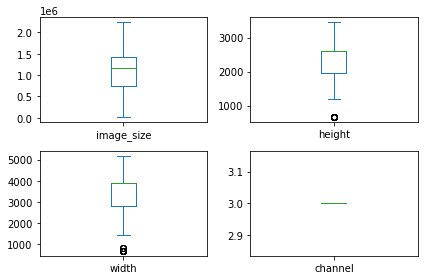

In [12]:
plt.subplot(2,2,1) 
retinopathy_df['image_size'].plot(kind='box') 

plt.subplot(2,2,2) 
retinopathy_df['height'].plot(kind='box') 

plt.subplot(2,2,3) 
retinopathy_df['width'].plot(kind='box') 

plt.subplot(2,2,4) 
retinopathy_df['channel'].plot(kind='box') 

plt.tight_layout()

In [13]:
retinopathy_df['image_no'] = retinopathy_df['image'].apply(lambda x:x.split('_')[0])
retinopathy_df['image_side'] = retinopathy_df['image'].apply(lambda x:x.split('_')[1])

retinopathy_df.head()

,image,level,image_shape,image_size,height,width,channel,image_no,image_side
0,1_left,0,"(2336, 3504, 3)",1147508,2336,3504,3,1,left
1,1_right,0,"(2336, 3504, 3)",1183978,2336,3504,3,1,right
2,2_left,0,"(1920, 2560, 3)",359372,1920,2560,3,2,left
3,2_right,0,"(1920, 2560, 3)",376230,1920,2560,3,2,right
4,3_left,0,"(1920, 2560, 3)",481639,1920,2560,3,3,left


In [14]:
image = retinopathy_df['image']
del retinopathy_df['image']
image_shape = retinopathy_df['image_shape']
del retinopathy_df['image_shape']

retinopathy_df.head()

,level,image_size,height,width,channel,image_no,image_side
0,0,1147508,2336,3504,3,1,left
1,0,1183978,2336,3504,3,1,right
2,0,359372,1920,2560,3,2,left
3,0,376230,1920,2560,3,2,right
4,0,481639,1920,2560,3,3,left


In [15]:
correlation_df=retinopathy_df[['image_size','height','width','image_no','image_side']].corr()
correlation_df

,image_size,height,width
image_size,1.000000,0.790326,0.809199
height,0.790326,1.000000,0.990041
width,0.809199,0.990041,1.000000


<AxesSubplot:>

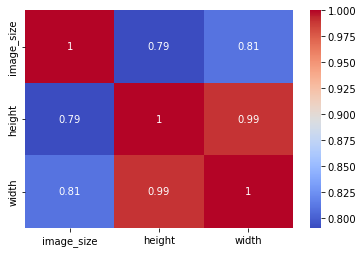

In [16]:
import seaborn as sns
sns.heatmap(correlation_df, cmap="coolwarm", annot=True)

## Modeling 

In [17]:
X = retinopathy_df.iloc[:, 1:8]
y = retinopathy_df.iloc[:, 0]
print(X)
print(y)

       image_size  height  width  channel image_no image_side
0         1147508    2336   3504        3        1       left
1         1183978    2336   3504        3        1      right
2          359372    1920   2560        3        2       left
3          376230    1920   2560        3        2      right
4          481639    1920   2560        3        3       left
...           ...     ...    ...      ...      ...        ...
53571     1427191    2592   3888        3    44346      right
53572     1115948    2592   3888        3    44350       left
53573     1148557    2592   3888        3    44350      right
53574      673356    1944   2592        3    44351       left
53575      611923    1944   2592        3    44351      right

[53576 rows x 6 columns]
0        0
1        0
2        0
3        0
4        0
        ..
53571    0
53572    0
53573    0
53574    0
53575    0
Name: level, Length: 53576, dtype: int64


In [18]:
X=pd.get_dummies(retinopathy_df, columns=['image_side'])
X

,level,image_size,height,width,channel,image_no,image_side_left,image_side_right
0,0,1147508,2336,3504,3,1,1,0
1,0,1183978,2336,3504,3,1,0,1
2,0,359372,1920,2560,3,2,1,0
3,0,376230,1920,2560,3,2,0,1
4,0,481639,1920,2560,3,3,1,0
...,...,...,...,...,...,...,...,...
53571,0,1427191,2592,3888,3,44346,0,1
53572,0,1115948,2592,3888,3,44350,1,0
53573,0,1148557,2592,3888,3,44350,0,1
53574,0,673356,1944,2592,3,44351,1,0


## Train and Test data split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [20]:
#Applying standard scaler on the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit_transform(X_train)
scale.transform(X_test)

array([[ 0.        , -1.68062201, -1.16828996, ...,  0.01370336,
         0.99904645, -0.99904645],
       [ 0.        , -1.75332174, -1.16828996, ...,  0.53343537,
         0.99904645, -0.99904645],
       [ 0.        , -0.43691571, -0.87833271, ..., -1.37011051,
        -1.00095446,  1.00095446],
       ...,
       [ 0.        , -0.42564934, -0.28136189, ..., -0.35786905,
         0.99904645, -0.99904645],
       [ 0.        ,  1.14610572, -0.34958713, ..., -0.20094816,
        -1.00095446,  1.00095446],
       [ 0.        , -0.67757607,  0.26444   , ...,  0.64803612,
        -1.00095446,  1.00095446]])

## Training

In [21]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [22]:
reg.fit(X_train, y_train)

LinearRegression()

## Testing

In [23]:
y_pred_train = reg.predict(X_train)

y_pred_test = reg.predict(X_test)

## Evaluation

In [24]:
from sklearn.metrics import r2_score
r2_S = r2_score(y_train, y_pred_train)
r2_S

1.0

In [25]:
from sklearn.metrics import r2_score
r2_S = r2_score(y_test, y_pred_test)
r2_S

1.0

Hence prediction is very like to be accurate.